<a href="https://colab.research.google.com/github/Laura9704/2025_-Analisis/blob/main/An%C3%A1lisis_Bivariado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [2]:
from google.colab import drive
drive.mount('/content/drive')
sns.set_theme(style="whitegrid")

Mounted at /content/drive


In [3]:
#llamado de la informacion
data = pd.read_csv('/content/drive/MyDrive/CVD_cleaned.csv')

 **Análisis Bivariado**

El presente análisis bivariado tiene como objetivo examinar la relación entre la condición de salud general (General_Health) y la presencia de enfermedades cardíacas (Heart_Disease). La selección de estas variables se basa en la premisa de que la salud general puede influir significativamente en el riesgo de padecer enfermedades cardiovasculares. Comprender esta relación puede aportar información valiosa para la identificación de patrones de riesgo y la toma de decisiones en salud pública.

Para este análisis, se calcularán estadísticas descriptivas y de asociación que permitirán evaluar la relación entre ambas variables. A partir de estos resultados, se interpretarán las tendencias observadas y su posible impacto en el estudio de enfermedades cardíacas

In [5]:
data.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

**Dos Variables Categoricas**

In [37]:
df_seleccionado = data[['General_Health', 'Heart_Disease']]#datos filtrados
df_seleccionado # Imprimir los datos filtrados

,General_Health,Heart_Disease
0,Poor,No
1,Very Good,Yes
2,Very Good,No
3,Poor,Yes
4,Good,No
...,...,...
308849,Very Good,No
308850,Fair,No
308851,Very Good,No
308852,Very Good,No


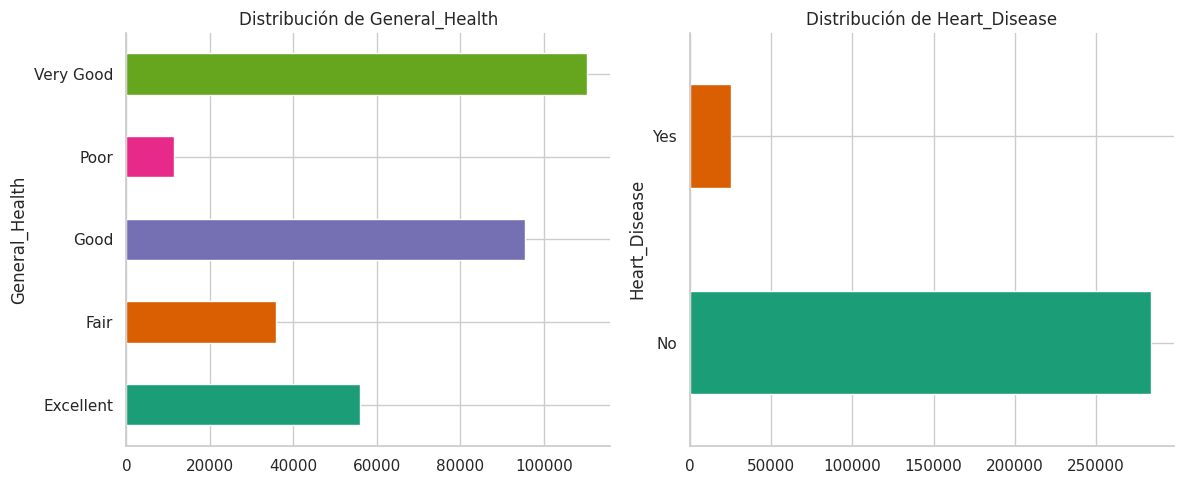

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas
df_seleccionado.groupby('General_Health').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=axes[0]) # Gráfico 1
axes[0].set_title('Distribución de General_Health')
axes[0].spines[['top', 'right']].set_visible(False)
df_seleccionado.groupby('Heart_Disease').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=axes[1])# Gráfico 2
axes[1].set_title('Distribución de Heart_Disease')
axes[1].spines[['top', 'right']].set_visible(False)
plt.tight_layout() # Ajustar el layout para que no se sobrepongan los gráficos
plt.show()

In [43]:
contingency_table = pd.crosstab(df_seleccionado['General_Health'], df_seleccionado['Heart_Disease'])# Crear la tabla de contingencia
print(contingency_table)# Mostrar la tabla

Heart_Disease       No   Yes
General_Health              
Excellent        54839  1115
Fair             29021  6789
Good             86721  8643
Poor              7729  3602
Very Good       105573  4822


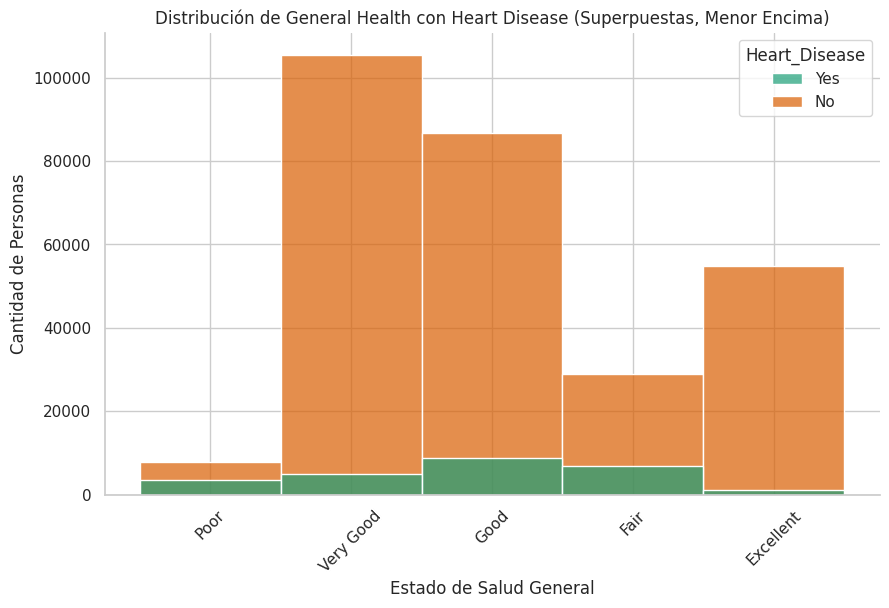

In [44]:
order = contingency_table.sum(axis=0).sort_values(ascending=True).index # Ordenar Heart_Disease por frecuencia ascendente (menor arriba)
plt.figure(figsize=(10, 6))# Crear el gráfico
sns.histplot(df_seleccionado, x="General_Health", hue="Heart_Disease", multiple="layer",palette="Dark2", alpha=0.7, hue_order=order)
plt.title("Distribución de General Health con Heart Disease (Superpuestas, Menor Encima)")
plt.xlabel("Estado de Salud General")
plt.ylabel("Cantidad de Personas")
plt.xticks(rotation=45)  # Rotar etiquetas del eje X
plt.gca().spines[['top', 'right']].set_visible(False)  # Eliminar bordes superiores y derechos
plt.show()

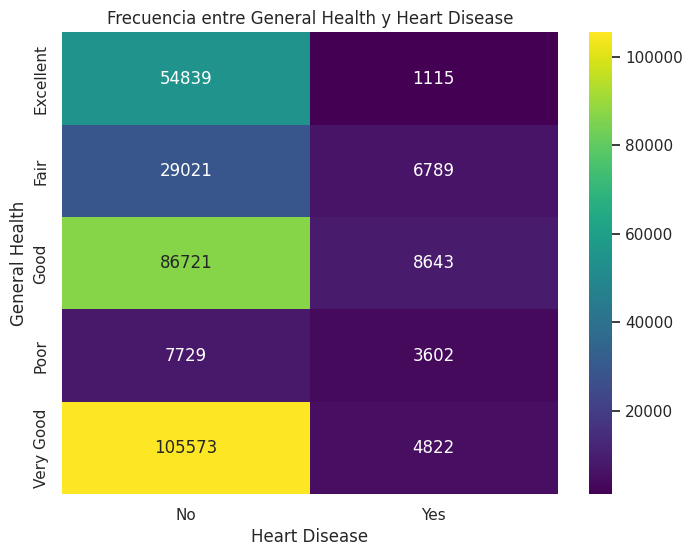

In [39]:
cross_tab = pd.crosstab(df_seleccionado['General_Health'], df_seleccionado['Heart_Disease'])# Crear tabla de frecuencias cruzadas
plt.figure(figsize=(8, 6)) #tamaño de la imagen
sns.heatmap(cross_tab, annot=True, cmap="viridis", fmt="d")# Crear heatmap
plt.title("Frecuencia entre General Health y Heart Disease")# Agregar títulos y etiquetas
plt.xlabel("Heart Disease")
plt.ylabel("General Health")
plt.show()

In [42]:
contingency_table = pd.crosstab(df_seleccionado['General_Health'], df_seleccionado['Heart_Disease'])# Crear la tabla de contingencia
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)# Realizar la prueba de Chi-cuadrado
print(f"Estadístico de Chi-cuadrado: {chi2:.4f}")
print(f"Valor p: {p:.4f}")
print(f"Grados de libertad: {dof}")

Estadístico de Chi-cuadrado: 19234.3341
Valor p: 0.0000
Grados de libertad: 4


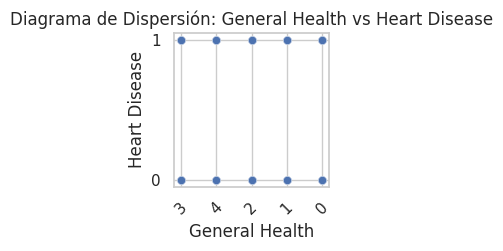

In [47]:
GH = df_seleccionado['General_Health'].astype('category').cat.codes # Asignar valores numéricos a las categorías
HD = df_seleccionado['Heart_Disease'].astype('category').cat.codes
plt.figure(figsize=(2, 2))
sns.scatterplot(x=GH, y=HD, alpha=0.3)
plt.xticks(ticks=range(len(GH.unique())), labels=GH.unique(), rotation=45)
plt.yticks(ticks=[0, 1], labels=HD.unique())
plt.xlabel("General Health")
plt.ylabel("Heart Disease")
plt.title("Diagrama de Dispersión: General Health vs Heart Disease")
plt.show()

**Una Categorica y Una numerica**